In [221]:
# import
import os
import sys
from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import plotly
import plotly.graph_objs as go

# import src.mongos as mg
from src.kobis import DB
from src.kobis import (get_boxoffice, is_holiday)

plotly.offline.init_notebook_mode(connected=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Const

In [2]:
# Const
docs_daily = 'daily_boxoffice'
movie_names = [
    '어벤져스',
    '어벤져스: 에이지 오브 울트론',
    '어벤져스 인피니티 워',
    '어벤져스: 엔드게임',
]
nm_avengers1 = '어벤져스'
nm_avengers2 = '어벤져스: 에이지 오브 울트론'
nm_avengers3 = '어벤져스: 인피니티 워'
nm_avengers4 = '어벤져스: 엔드게임'
nm_myungryang = '명량'
nm_with_god = '신과함께-죄와 벌'
nm_extreme_job = '극한직업'
nm_ = ''

# Load

In [37]:
# box
raw = get_boxoffice(trim=False)
raw.head()

# Prepare

In [80]:
def prepare_kobis(df):
    df['year'] = df['targetDt_f'].apply(lambda x: x.year)
    df['month'] = df['targetDt_f'].apply(lambda x: x.month)
    df['audiCnt_num'] = df['audiCnt'].astype('int')
    df['audiAcc_num'] = df['audiAcc'].astype('int')
    df['showCnt_num'] = df['showCnt'].astype('int')
    df['cnt_show'] = df['audiCnt_num'] / df['showCnt_num']
    df['scrnCnt_num'] = df['scrnCnt'].astype('int')
    df['cnt_scrn'] = df['audiCnt_num'] / df['scrnCnt_num']
    
    df = df.loc[(df['targetDt_f']>=df['openDt_f'])].reset_index(drop=True)
    
    return df

box = prepare_kobis(raw)

# Functions

In [8]:
def get_movie(box, name):
    idx_movie = box['movieNm'] == name
    return box.loc[idx_movie].reset_index(drop=True)

# Get Movies

In [170]:
endgame = get_movie(box, nm_avengers4)
mr = get_movie(box, nm_myungryang)
extreme = get_movie(box, nm_extreme_job)


# Yearly Trend

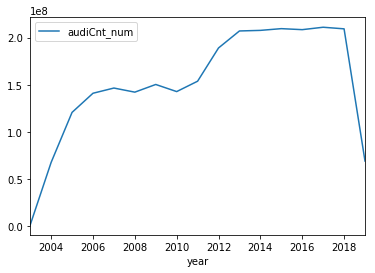

In [10]:
audi_cnt_year = box.groupby('year').agg({'audiCnt_num':'sum'})
audi_cnt_year.plot(kind='line',)

In [11]:
idx_2018 = box['year']==2018
box.loc[idx_2018].head()

,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,openDt_f,targetDt_f,isHoliday,year,month,audiCnt_num,audiAcc_num,showCnt_num,acc_show
51530,101002,-7.7,19322,-1612,20176947,원더,2017-12-27,7,0,OLD,7,790939300,158549600,-7.3,-12511700,1.1,183,378,20180101,2017-12-27,2018-01-01,True,2018,1,19322,101002,378,267.201058
51532,42390,-10.4,5940,-693,20177479,극장판 프리파라 모두의 동경♪ 렛츠고☆프리파리,2017-12-28,9,0,OLD,9,327731800,47882900,-9.4,-4968200,0.3,166,246,20180101,2017-12-28,2018-01-01,True,2018,1,5940,42390,246,172.317073
51531,787493,0,13750,-3,20174846,뽀로로 극장판 공룡섬 대모험,2017-12-07,8,0,OLD,8,5958096200,109207600,0.1,60400,0.7,195,270,20180101,2017-12-07,2018-01-01,True,2018,1,13750,787493,270,2916.640741
51533,949845,-9.8,3298,-357,20170443,스타워즈: 라스트 제다이,2017-12-14,10,0,OLD,10,8570976561,35090500,-10.6,-4164800,0.2,35,42,20180101,2017-12-14,2018-01-01,True,2018,1,3298,949845,42,22615.357143
51529,368135,0.5,26521,128,20176082,몬스터 패밀리,2017-12-21,6,0,OLD,6,2736976000,205793300,2.3,4588900,1.4,342,463,20180101,2017-12-21,2018-01-01,True,2018,1,26521,368135,463,795.107991


# Monthly Trend

In [12]:
def draw_monthly(df, year):
    idx = df['year']==year
    
    df_year = df.loc[idx, ['targetDt_f', 'audiCnt_num']].resample('M', on='targetDt_f').sum().reset_index().sort_values('targetDt_f', ascending=True)
    df_year.plot(x='targetDt_f', y='audiCnt_num', kind='line')

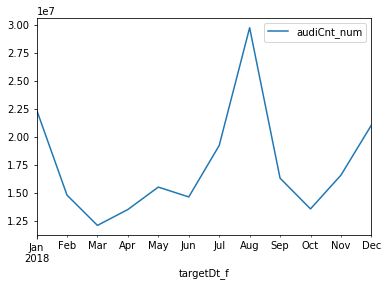

In [13]:
# do subplots: 2018, 2017 ...
draw_monthly(box, 2018)

# 천만관객 영화

In [1]:
audi_acc = box.groupby('movieNm').agg({'audiAcc_num': 'max', 'openDt_f': 'first'})
audi_acc.head()

audi_acc.sort_values('audiAcc_num', ascending=False).head(10)

NameError: name 'box' is not defined

In [17]:
audi_acc.sort_values('audiAcc_num', ascending=False).head(10).index

Index(['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '베테랑', '아바타', '도둑들', '7번방의 선물', '암살',
       '광해, 왕이 된 남자'],
      dtype='object', name='movieNm')

# 상영 횟수와 관객 비율

In [18]:
box.sort_values('targetDt_f', ascending=False).head()

,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,openDt_f,targetDt_f,isHoliday,year,month,audiCnt_num,audiAcc_num,showCnt_num,acc_show
56413,8610,-25.6,1691,-582,20199736,프렌즈: 둥지탈출,2019-05-01,10,-5,OLD,10,57576550,12597800,-8.1,-1107400,0.1,135,140,20190504,2019-05-01,2019-05-04,True,2019,5,1691,8610,140,61.500000
56411,5794498,27.9,1975,431,20181877,캡틴 마블,2019-03-06,8,1,OLD,8,51435128863,17681450,29.9,4072030,0.2,41,62,20190504,2019-03-06,2019-05-04,True,2019,5,1975,5794498,62,93459.645161
56410,7080,35.1,2107,547,20199189,미스 스티븐스,2019-05-02,7,1,OLD,7,56675270,18400630,29.2,4155540,0.2,62,99,20190504,2019-05-02,2019-05-04,True,2019,5,2107,7080,99,71.515152
56409,480108,41.9,2433,719,20060347,판의 미로 - 오필리아와 세 개의 열쇠,2006-11-30,6,0,OLD,6,2857234148,21075600,42.4,6275100,0.2,38,89,20190504,2006-11-30,2019-05-04,True,2019,5,2433,480108,89,5394.471910
56408,29071,64.2,6442,2519,20197147,어글리 돌,2019-05-01,5,-1,OLD,5,207269840,49157450,92.1,23567600,0.5,310,349,20190504,2019-05-01,2019-05-04,True,2019,5,6442,29071,349,83.297994


In [68]:
cols_show = ['audiCnt_num', 'showCnt_num', 'cnt_show']
cols_scrn = ['audiCnt_num', 'scrnCnt_num', 'cnt_scrn']

In [62]:
mr[cols_show].head(20)

,audiCnt_num,showCnt_num,cnt_show
0,5369,28,191.750000
1,837,4,209.250000
2,1890,10,189.000000
3,1164,6,194.000000
4,2428,18,134.888889
5,8073,40,201.825000
6,682701,6147,111.062469
7,705070,6258,112.666986
8,867437,6699,129.487535
9,1232529,7605,162.068245


In [63]:
endgame[cols_show].head(20)

,audiCnt_num,showCnt_num,cnt_show
0,1338740,12544,106.723533
1,832264,12339,67.449874
2,1046692,12831,81.575247
3,1662381,13397,124.086064
4,1427493,13055,109.344542
5,471733,12415,37.997020
6,551306,12584,43.810076
7,911485,11104,82.086185
8,376880,10630,35.454374
9,567167,11046,51.345917


In [64]:
extreme[cols_show].head(20)

,audiCnt_num,showCnt_num,cnt_show
0,7746,40,193.650000
1,368582,8463,43.552168
2,331924,8797,37.731499
3,386371,9467,40.812401
4,995406,10462,95.144905
5,1033089,10631,97.177029
6,397188,9914,40.063345
7,358186,10033,35.700787
8,564825,7882,71.660112
9,350685,7878,44.514471


In [69]:
mr[cols_scrn].head(20)

,audiCnt_num,scrnCnt_num,cnt_scrn
0,5369,18,298.277778
1,837,4,209.250000
2,1890,8,236.250000
3,1164,6,194.000000
4,2428,18,134.888889
5,8073,37,218.189189
6,682701,1159,589.043141
7,705070,1202,586.580699
8,867437,1300,667.259231
9,1232529,1494,824.985944


In [70]:
endgame[cols_scrn].head(20)

,audiCnt_num,scrnCnt_num,cnt_scrn
0,1338740,2760,485.050725
1,832264,2759,301.654223
2,1046692,2796,374.353362
3,1662381,2835,586.377778
4,1427493,2833,503.880339
5,471733,2794,168.837867
6,551306,2802,196.754461
7,911485,2508,363.431021
8,376880,2458,153.327909
9,567167,2490,227.777912


In [71]:
box.sort_values('scrnCnt_num', ascending=False).head()

,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,openDt_f,targetDt_f,isHoliday,year,month,audiCnt_num,audiAcc_num,showCnt_num,cnt_show,scrnCnt_num,cnt_scrn
56334,4880701,58.8,1662381,615689,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,41543203770,14969296600,53.8,5233455580,92.3,2835,13397,20190427,2019-04-24,2019-04-27,True,2019,4,1662381,4880701,13397,124.086064,2835,586.377778
56344,6308194,-14.1,1427493,-234888,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,54357090850,12813887080,-14.4,-2155409520,91.2,2833,13055,20190428,2019-04-24,2019-04-28,True,2019,4,1427493,6308194,13055,109.344542,2833,503.880339
56364,7331233,16.9,551306,79573,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,63198481930,4742227860,15.7,643064640,92.7,2802,12584,20190430,2019-04-24,2019-04-30,False,2019,4,551306,7331233,12584,43.810076,2802,196.754461
56324,3218320,25.8,1046692,214428,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,26573907170,9735841020,36.2,2586202470,95.8,2796,12831,20190426,2019-04-24,2019-04-26,False,2019,4,1046692,3218320,12831,81.575247,2796,374.353362
56354,6779927,-67,471733,-955760,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,58456254070,4099163220,-68,-8714723860,92.9,2794,12415,20190429,2019-04-24,2019-04-29,False,2019,4,471733,6779927,12415,37.997020,2794,168.837867


# movies

In [75]:
movies = box.groupby('movieCd').agg({'movieNm': 'first', 'audiAcc_num': 'max', 'scrnCnt_num': 'mean', 'showCnt_num': 'mean',
                                    'openDt_f':'first'})
movies.head()

,movieNm,audiAcc_num,scrnCnt_num,showCnt_num,openDt_f
movieCd,,,,,
19548002,사브리나,7466,1.000000,4.000000,NaT
19720061,정무문,9528,11.000000,11.000000,1973-07-27
19818004,불의 전차,44957,19.000000,22.000000,2016-06-16
19820019,만추,837633,269.238095,1159.904762,2011-02-17
19869057,영웅본색,1211,7.000000,27.000000,1987-05-23


In [93]:
movies.sort_values('scrnCnt_num', ascending=False).head(30)

,movieNm,audiAcc_num,scrnCnt_num,showCnt_num,openDt_f
movieCd,,,,,
20184889,어벤져스: 엔드게임,10086512,2679.818182,12051.727273,2019-04-24
20177478,어벤져스: 인피니티 워,11181178,1133.612245,4881.408163,2018-04-25
20182530,극한직업,16252577,1068.087719,5115.929825,2019-01-23
20159364,캡틴 아메리카: 시빌 워,8660800,1045.714286,4603.057143,2016-04-27
20167303,스파이더맨: 홈 커밍,7249898,981.388889,4560.777778,2017-07-05
20148493,어벤져스: 에이지 오브 울트론,10482686,921.454545,4339.340909,2015-04-23
20180290,아쿠아맨,5023929,904.545455,3117.696970,2018-12-19
20151229,더 킹,5304371,900.928571,3830.607143,2017-01-18
20180522,앤트맨과 와스프,5444801,900.484848,4486.000000,2018-07-04


# n일차 스크린 갯수

In [266]:
cut_criteria = len(endgame)
# cut_criteria = 10

box_cut = box.sort_values(['movieCd', 'targetDt_f']).groupby('movieCd').head(cut_criteria).sort_values(['movieCd', 'targetDt_f'])
movies_cut = box_cut.groupby('movieCd').agg({'movieNm': 'first', 'audiAcc_num': 'max', 'scrnCnt_num': 'sum', 'cnt_scrn': 'last',
                                    'openDt_f':'first', 'movieCd':'count'})
movies_cut.head()
movies_cut['acc_div_scrn'] = movies_cut['audiAcc_num'] / movies_cut['scrnCnt_num']
movies_cut.rename(columns={'movieCd':'days'}, inplace=True)

bar_data = movies_cut.sort_values('scrnCnt_num', ascending=False).head(10)
bar_data

,movieNm,audiAcc_num,scrnCnt_num,cnt_scrn,openDt_f,days,acc_div_scrn
movieCd,,,,,,,
20184889,어벤져스: 엔드게임,10086512,29478,368.388866,2019-04-24,11,342.170839
20177478,어벤져스: 인피니티 워,7760285,25650,369.082284,2018-04-25,11,302.545224
20181877,캡틴 마블,4234325,20992,265.483418,2019-03-06,11,201.711366
20186202,신과함께-인과 연,9060945,20411,469.469774,2018-08-01,11,443.924599
20159364,캡틴 아메리카: 시빌 워,6960009,20223,300.385935,2016-04-27,11,344.163032
20167303,스파이더맨: 홈 커밍,5374369,19574,354.894441,2017-07-05,11,274.566721
20182530,극한직업,6235877,19146,509.288360,2019-01-23,11,325.701295
20148493,어벤져스: 에이지 오브 울트론,7011605,18652,463.691878,2015-04-23,11,375.917060
20150976,신과함께-죄와 벌,7515538,18216,545.192077,2017-12-20,11,412.578942


In [267]:
movies_all = box.groupby('movieCd').agg({'movieNm': 'first', 'audiAcc_num': 'max', 'scrnCnt_num': 'mean', 'cnt_scrn': 'last',
                                    'openDt_f':'first', 'movieCd':'count'})
movies_all['acc_div_scrn'] = movies_all['audiAcc_num'] / movies_all['scrnCnt_num']

movies_all.sort_values('scrnCnt_num', ascending=False).head(30)


,movieNm,audiAcc_num,scrnCnt_num,cnt_scrn,openDt_f,movieCd,acc_div_scrn
movieCd,,,,,,,
20184889,어벤져스: 엔드게임,10086512,2679.818182,368.388866,2019-04-24,11,3763.879232
20177478,어벤져스: 인피니티 워,11181178,1133.612245,18.168000,2018-04-25,49,9863.317947
20182530,극한직업,16252577,1086.446429,14.155882,2019-01-23,56,14959.391069
20159364,캡틴 아메리카: 시빌 워,8660800,1045.714286,21.357447,2016-04-27,35,8282.185792
20167303,스파이더맨: 홈 커밍,7249898,1009.200000,38.859504,2017-07-05,35,7183.806976
20186202,신과함께-인과 연,12264813,957.217391,24.838565,2018-08-01,46,12812.985965
20148493,어벤져스: 에이지 오브 울트론,10482686,942.744186,32.388889,2015-04-23,43,11119.332429
20180290,아쿠아맨,5023929,932.156250,15.698997,2018-12-19,32,5389.578196
20180522,앤트맨과 와스프,5444801,928.375000,28.882353,2018-07-04,32,5864.872492


In [117]:

movies_all.sort_values('acc_div_scrn', ascending=False).head(30)

,movieNm,audiAcc_num,scrnCnt_num,cnt_scrn,openDt_f,movieCd,acc_div_scrn
movieCd,,,,,,,
20110162,바보야,16710,1,479.000000,2011-04-21,1,16710.000000
20100030,2008 서태지 심포니 위드 톨가 카쉬프 로열필하모닉,16013,1,2138.000000,2010-01-22,1,16013.000000
20179106,겨울왕국의 무민,24559,2,1392.500000,2018-02-08,1,12279.500000
20111250,써니 감독판,89753,8,452.250000,2011-07-28,2,11219.125000
20130929,스톤,16361,3,553.666667,2014-06-12,1,5453.666667
20100266,서태지밴드 라이브 투어 <더 뫼비우스>,10251,2,1180.000000,2010-05-21,2,5125.500000
20134705,맛있는 사랑공식-섹스,4560,1,1620.000000,2013-10-31,1,4560.000000
20175461,암살교실: 졸업편,3772,1,2678.000000,2017-04-21,1,3772.000000
20147690,아이스맨,5500,2,365.000000,2014-03-27,1,2750.000000


# ML

In [203]:
col_ml = ['audiCnt_num', 'movieCd', 'isHoliday', 'targetDt_f']

In [180]:
raw_av1 = get_movie(box, nm_avengers1)
raw_av2 = get_movie(box, nm_avengers2)
raw_av3 = get_movie(box, nm_avengers3)
raw_av4 = get_movie(box, nm_avengers4)

In [205]:
def prepare_ml(df):
    df = df.loc[::, col_ml].reset_index()
    df.rename(columns={'index':'days'}, inplace=True)
    df['days'] += 1
    return df


av1 = prepare_ml(raw_av1)
av2 = prepare_ml(raw_av2)
av3 = prepare_ml(raw_av3)
av4 = prepare_ml(raw_av4)
avs = av1.append([av2, av3, av4])
avs.tail()

,days,audiCnt_num,movieCd,isHoliday,targetDt_f
6,7,551306,20184889,False,2019-04-30
7,8,911485,20184889,False,2019-05-01
8,9,376880,20184889,False,2019-05-02
9,10,567167,20184889,False,2019-05-03
10,11,899974,20184889,True,2019-05-04


In [265]:
def get_target(df):
    last_day = df.iloc[-1]['days']; last_day
    first_date = df.iloc[0]['targetDt_f']
    last_date = df.iloc[-1]['targetDt_f']; last_date
    range_prediction = list(range(last_day+1, 61)); range_prediction
    date_prediction = [first_date + timedelta(days=d-1) for d in range_prediction]; date_prediction
    is_holiday_prediction = [is_holiday(d) for d in date_prediction]; is_holiday_prediction

    print(len(range_prediction), len(date_prediction), len(is_holiday_prediction))

    len_target = len(range_prediction)
    d = {
        'days': range_prediction,
        'isHoliday': is_holiday_prediction,
        'targetDt_f': date_prediction,
        '20124721': [0]*len_target,
        '20148493': [0]*len_target,
        '20177478': [0]*len_target,
        '20184889': [1]*len_target,
    }

    df_prediction = pd.DataFrame(data=d)
    return df_prediction

target = get_target(av4); target.head()

49 49 49


,days,isHoliday,targetDt_f,20124721,20148493,20177478,20184889
0,12,True,2019-05-05,0,0,0,1
1,13,True,2019-05-06,0,0,0,1
2,14,False,2019-05-07,0,0,0,1
3,15,False,2019-05-08,0,0,0,1
4,16,False,2019-05-09,0,0,0,1


In [262]:
def add_cat_columns(df):
    df = df.copy().reset_index(drop=True)
    from sklearn.preprocessing import LabelBinarizer
    binarizer = LabelBinarizer()
    arr_cat = binarizer.fit_transform(df['movieCd'])
    cols = binarizer.classes_
    categories = pd.DataFrame(columns=cols, data=arr_cat)
    for col in categories.columns:
        df[col] = categories[col]
    
    return df


target_cat = add_cat_columns(avs)
target_cat

,days,audiCnt_num,movieCd,isHoliday,targetDt_f,20124721,20148493,20177478,20184889
0,1,214105,20124721,False,2012-04-26,1,0,0,0
1,2,273544,20124721,False,2012-04-27,1,0,0,0
2,3,554479,20124721,True,2012-04-28,1,0,0,0
3,4,517247,20124721,True,2012-04-29,1,0,0,0
4,5,229617,20124721,False,2012-04-30,1,0,0,0
5,6,373004,20124721,False,2012-05-01,1,0,0,0
6,7,172731,20124721,False,2012-05-02,1,0,0,0
7,8,161353,20124721,False,2012-05-03,1,0,0,0
8,9,286669,20124721,False,2012-05-04,1,0,0,0
9,10,659320,20124721,True,2012-05-05,1,0,0,0


In [202]:
raw_av4.head()

,audiAcc,audiChange,audiCnt,audiInten,movieCd,movieNm,openDt,rank,rankInten,rankOldAndNew,rnum,salesAcc,salesAmt,salesChange,salesInten,salesShare,scrnCnt,showCnt,targetDt,openDt_f,targetDt_f,isHoliday,year,month,audiCnt_num,audiAcc_num,showCnt_num,cnt_show,scrnCnt_num,cnt_scrn
0,1339364,214441.7,1338740,1338116,20184889,어벤져스: 엔드게임,2019-04-24,1,22,OLD,1,9688427600,9679067600,103308.8,9669707600,97.1,2760,12544,20190424,2019-04-24,2019-04-24,False,2019,4,1338740,1339364,12544,106.723533,2760,485.050725
1,2171628,-37.8,832264,-506476,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,16838066150,7149638550,-26.1,-2529429050,95.3,2759,12339,20190425,2019-04-24,2019-04-25,False,2019,4,832264,2171628,12339,67.449874,2759,301.654223
2,3218320,25.8,1046692,214428,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,26573907170,9735841020,36.2,2586202470,95.8,2796,12831,20190426,2019-04-24,2019-04-26,False,2019,4,1046692,3218320,12831,81.575247,2796,374.353362
3,4880701,58.8,1662381,615689,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,41543203770,14969296600,53.8,5233455580,92.3,2835,13397,20190427,2019-04-24,2019-04-27,True,2019,4,1662381,4880701,13397,124.086064,2835,586.377778
4,6308194,-14.1,1427493,-234888,20184889,어벤져스: 엔드게임,2019-04-24,1,0,OLD,1,54357090850,12813887080,-14.4,-2155409520,91.2,2833,13055,20190428,2019-04-24,2019-04-28,True,2019,4,1427493,6308194,13055,109.344542,2833,503.880339


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

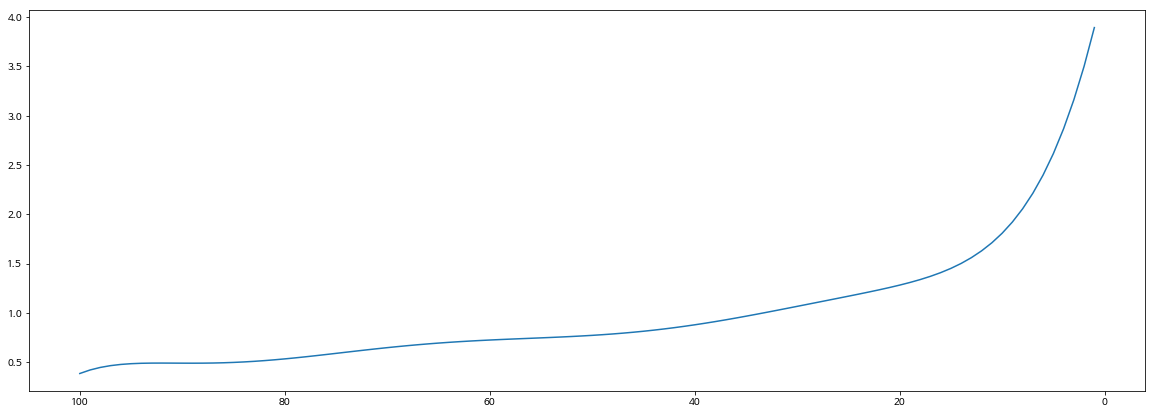

In [51]:
predict= np.array(range(1, 101)).reshape(-1, 1)

X = tmp['ranking_num'].values.reshape(-1, 1)
y = tmp['gaon_score_rate'].values.reshape(-1, 1)


def draw_prediction(degree):
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)

    rgr = linear_model.LinearRegression()
    rgr.fit(X_, y)
    
    predict_ = poly.fit_transform(predict)
    
    y_plot = rgr.predict(predict_)
    x_plot = predict
    plt.figure(figsize=(20,7))
    plt.plot(x_plot, y_plot, )
    plt.gca().invert_xaxis()


draw_prediction(7)